In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spacy

# Loading the dataset

In [2]:
df=pd.read_csv('Combined Data.csv/Combined Data.csv')
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [3]:
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

# Display the first few rows to verify
df.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [4]:
df.tail()

,statement,status
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety
53042,I have really bad door anxiety! It's not about...,Anxiety


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB


# Length of the Dataset

In [6]:
len(df)

53043

# size and shape of the dataset

In [7]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 53043
Number of columns: 2


# Description of the dataset

In [8]:
df.describe()

,statement,status
count,52681,53043
unique,51073,7
top,what do you mean?,Normal
freq,22,16351


# checking for missing values in the dataframe.

In [9]:
print(df.isnull().sum())

statement    362
status         0
dtype: int64


# Dropping these missing values:

In [10]:
df = df.dropna()
print(df.isnull().sum())

statement    0
status       0
dtype: int64


# Exploratory Data Analysis:

In [11]:
# Calculate the length of each statement
df['statement_length'] = df['statement'].apply(len)

# Display basic statistics of statement lengths
print(df['statement_length'].describe())

count    52681.000000
mean       578.713863
std        846.269078
min          2.000000
25%         80.000000
50%        317.000000
75%        752.000000
max      32759.000000
Name: statement_length, dtype: float64


# checking the number of nunique values in the dataset

In [12]:
df['status'].nunique()

7

# checking the unique values in the dataset.

In [13]:
df['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

# number of characters and words per statement:

In [14]:
# characters length
df['statment_length']=df['statement'].apply(lambda x:len(x))
# words length
df['num_of_words']=df['statement'].apply(lambda x:len(x.split()))
print("maximum number of characters per statment:", df['statment_length'].max())
print("maximum number of words per statment:", df['num_of_words'].max())


maximum number of characters per statment: 32759
maximum number of words per statment: 6300


# distribution of the 'status' column with their value counts

In [15]:
# Check the distribution of the 'status' column with their value counts
sentiment_distribution = df['status'].value_counts()

# Display the distribution
print(sentiment_distribution)

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of Sentiments'}, xlabel='status'>

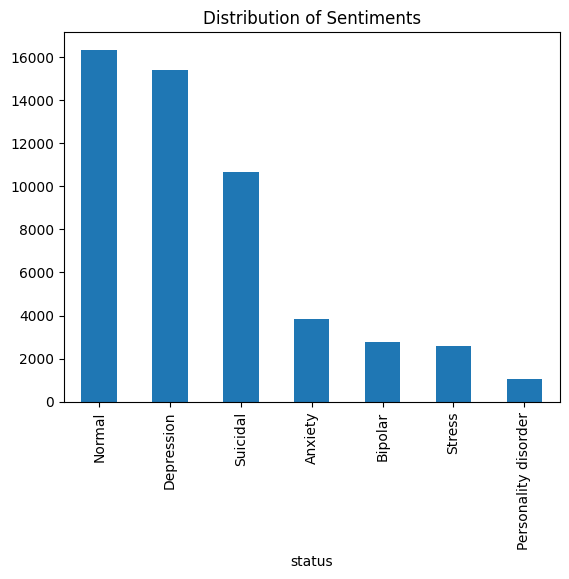

In [16]:
# plotting graph for visualizations
sentiment_distribution.plot(kind='bar', title='Distribution of Sentiments')

# Correlation between statment length and number of words

<Axes: >

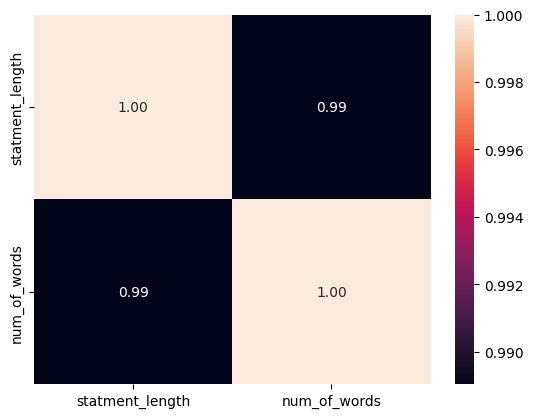

In [17]:
import seaborn as sns
corr=df[['statment_length','num_of_words']].corr()
sns.heatmap(corr,annot=True,fmt='.2f')

# Data Preprocessing:

In [18]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import download

# Download necessary NLTK resources
download('stopwords')
download('punkt')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Remove repetitive words (keep only unique words)
    tokens = list(set(tokens))
    
    # Reconstruct the text from tokens
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\masih\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\masih\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
# Apply preprocessing to the 'statement' column
df['cleaned_statement'] = df['statement'].apply(preprocess_text)

# Display the DataFrame with cleaned text
print(df[['cleaned_statement', 'status']])

                                       cleaned_statement   status
0                                                oh gosh  Anxiety
1      restless heart tune mind confused trouble slee...  Anxiety
2      doubt dear stay forward restless back place wrong  Anxiety
3      ive still focus else something im worried shifted  Anxiety
4                             mean restless boy im month  Anxiety
...                                                  ...      ...
53038  ended alone eventually normal feel vitamin lik...  Anxiety
53039  try suffered deserve gt least mistake belong c...  Anxiety
53040       way nights help better sleep meds cant didnt  Anxiety
53041  speaking week ceo forget certain much kicks su...  Anxiety
53042  bad honestly door pulling opening problem way ...  Anxiety

[52681 rows x 2 columns]


# Balancing the Dataset

In [20]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Separate the features and the target variable
X = df['cleaned_statement']  # Use preprocessed text data
y = df['status']  # Use the original status labels (categorical)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Check the new class distribution
print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_resampled))




Original dataset shape: Counter({'Normal': 16343, 'Depression': 15404, 'Suicidal': 10652, 'Anxiety': 3841, 'Bipolar': 2777, 'Stress': 2587, 'Personality disorder': 1077})
Resampled dataset shape: Counter({'Anxiety': 16343, 'Normal': 16343, 'Depression': 16343, 'Suicidal': 16343, 'Stress': 16343, 'Bipolar': 16343, 'Personality disorder': 16343})


# Training and Testing Split:

In [21]:
# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (91520, 78550)
X_test shape: (22881, 78550)
y_train shape: (91520,)
y_test shape: (22881,)


# Traditional Machine Learning Models

# Naive Bayes:

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Assuming X_resampled and y_resampled are already defined# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_clf = MultinomialNB()

# Train the classifier
nb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_clf.predict(X_test)
y_prob = nb_clf.predict_proba(X_test)

# Print the classification report for each classprint("Classification Report:")
print(classification_report(y_test, y_pred))

# Binarize the output labels for ROC-AUC calculation (for multi-class problems)
y_test_bin = label_binarize(y_test, classes=nb_clf.classes_)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

print(f"ROC-AUC: {roc_auc:.2f}")


                      precision    recall  f1-score   support

             Anxiety       0.85      0.88      0.86      3375
             Bipolar       0.78      0.96      0.86      3214
          Depression       0.60      0.60      0.60      3274
              Normal       0.96      0.42      0.58      3325
Personality disorder       0.73      0.99      0.84      3241
              Stress       0.80      0.84      0.82      3209
            Suicidal       0.73      0.65      0.69      3243

            accuracy                           0.76     22881
           macro avg       0.78      0.76      0.75     22881
        weighted avg       0.78      0.76      0.75     22881

ROC-AUC: 0.97


# Hyperparameter tuning:

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import label_binarize

def tune_naive_bayes(X_resampled, y_resampled, param_grid, test_size=0.2, random_state=42, cv=5):
    """
    Function to perform hyperparameter tuning on a Multinomial Naive Bayes model.

    Parameters:
    - X_resampled: Feature matrix (sparse matrix or dense array).
    - y_resampled: Target vector.
    - param_grid: Dictionary of hyperparameters to tune.
    - test_size: Proportion of the dataset to include in the test split.
    - random_state: Controls the shuffling applied to the data before applying the split.
    - cv: Number of cross-validation folds.

    Returns:
    - best_params: Best hyperparameters found.
    - metrics: Dictionary containing evaluation metrics (classification report and ROC-AUC).
    """# Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=random_state)

    # Initialize the Naive Bayes classifier
    nb_clf = MultinomialNB()

    # Create the GridSearchCV object
    grid_search = GridSearchCV(nb_clf, param_grid, scoring='accuracy', cv=cv, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Get the best estimator and its parameters
    best_nb_clf = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Train the best estimator on the entire training set
    best_nb_clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = best_nb_clf.predict(X_test)
    y_prob = best_nb_clf.predict_proba(X_test)

    # Print the classification report
    classification_rep = classification_report(y_test, y_pred)

    # Binarize the output labels for ROC-AUC calculation (for multi-class problems)
    y_test_bin = label_binarize(y_test, classes=best_nb_clf.classes_)

    # Calculate the ROC-AUC score
    roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

    # Compile metrics
    metrics = {
        'classification_report': classification_rep,
        'ROC-AUC': roc_auc
    }

    return best_params, metrics

# Example usage:
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0], 'fit_prior': [True, False]}
best_params, metrics = tune_naive_bayes(X_resampled, y_resampled, param_grid)

print("Best Parameters:", best_params)
print("Classification Report:")
print(metrics['classification_report'])
print(f"ROC-AUC: {metrics['ROC-AUC']:.2f}")


Best Parameters: {'alpha': 0.1, 'fit_prior': False}
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.87      0.93      0.90      3375
             Bipolar       0.87      0.97      0.92      3214
          Depression       0.69      0.59      0.63      3274
              Normal       0.93      0.62      0.75      3325
Personality disorder       0.86      0.99      0.92      3241
              Stress       0.86      0.93      0.89      3209
            Suicidal       0.71      0.78      0.75      3243

            accuracy                           0.83     22881
           macro avg       0.83      0.83      0.82     22881
        weighted avg       0.83      0.83      0.82     22881

ROC-AUC: 0.98


In [24]:
# Example usage:
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0], 'fit_prior': [True]}
best_params, metrics = tune_naive_bayes(X_resampled, y_resampled, param_grid)

print("Best Parameters:", best_params)
print("Classification Report:")
print(metrics['classification_report'])
print(f"ROC-AUC: {metrics['ROC-AUC']:.2f}")

Best Parameters: {'alpha': 0.1, 'fit_prior': True}
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.88      0.92      0.90      3375
             Bipolar       0.87      0.97      0.92      3214
          Depression       0.69      0.58      0.63      3274
              Normal       0.93      0.62      0.75      3325
Personality disorder       0.86      0.99      0.92      3241
              Stress       0.85      0.93      0.89      3209
            Suicidal       0.71      0.78      0.75      3243

            accuracy                           0.83     22881
           macro avg       0.83      0.83      0.82     22881
        weighted avg       0.83      0.83      0.82     22881

ROC-AUC: 0.98


In [25]:
# Example usage:
param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0], 'fit_prior': [True, False]}
best_params, metrics = tune_naive_bayes(X_resampled, y_resampled, param_grid)

print("Best Parameters:", best_params)
print("Classification Report:")
print(metrics['classification_report'])
print(f"ROC-AUC: {metrics['ROC-AUC']:.2f}")

Best Parameters: {'alpha': 0.01, 'fit_prior': False}
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.89      0.94      0.91      3375
             Bipolar       0.88      0.98      0.93      3214
          Depression       0.71      0.60      0.65      3274
              Normal       0.94      0.64      0.76      3325
Personality disorder       0.89      0.99      0.94      3241
              Stress       0.88      0.94      0.91      3209
            Suicidal       0.71      0.80      0.75      3243

            accuracy                           0.84     22881
           macro avg       0.84      0.84      0.84     22881
        weighted avg       0.84      0.84      0.84     22881

ROC-AUC: 0.98


In [26]:
# Example usage:
param_grid = {'alpha': [0.01, 0.05, 0.1, 0.5, 1.0], 'fit_prior': [True]}
best_params, metrics = tune_naive_bayes(X_resampled, y_resampled, param_grid)

print("Best Parameters:", best_params)
print("Classification Report:")
print(metrics['classification_report'])
print(f"ROC-AUC: {metrics['ROC-AUC']:.2f}")

Best Parameters: {'alpha': 0.01, 'fit_prior': True}
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.89      0.94      0.92      3375
             Bipolar       0.88      0.98      0.93      3214
          Depression       0.71      0.60      0.65      3274
              Normal       0.94      0.64      0.76      3325
Personality disorder       0.89      0.99      0.94      3241
              Stress       0.88      0.94      0.91      3209
            Suicidal       0.71      0.80      0.75      3243

            accuracy                           0.84     22881
           macro avg       0.84      0.84      0.84     22881
        weighted avg       0.84      0.84      0.84     22881

ROC-AUC: 0.98


# Logistic Regression:

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Initialize the Logistic Regression classifier
logreg_clf = LogisticRegression(max_iter=500, random_state=42)

# Train the classifier
logreg_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_clf.predict(X_test)
y_prob = logreg_clf.predict_proba(X_test)

# Print classification report for each label
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# For ROC-AUC, binarize the output labels if it's a multi-class problem
y_test_bin = label_binarize(y_test, classes=logreg_clf.classes_)
roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

# Print the ROC-AUC score
print(f"ROC-AUC: {roc_auc:.2f}")


Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.95      0.95      0.95      3375
             Bipolar       0.96      0.96      0.96      3214
          Depression       0.75      0.65      0.69      3274
              Normal       0.85      0.91      0.88      3325
Personality disorder       0.97      0.99      0.98      3241
              Stress       0.91      0.95      0.93      3209
            Suicidal       0.74      0.74      0.74      3243

            accuracy                           0.88     22881
           macro avg       0.88      0.88      0.88     22881
        weighted avg       0.88      0.88      0.88     22881

ROC-AUC: 0.98


# Hyperparameter Tuning:

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import label_binarize

# Function to train and evaluate the Logistic Regression model
def train_and_evaluate(X_resampled, y_resampled, param_grid=None):
    # Split the resampled data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    
    # Initialize the Logistic Regression classifier
    logreg_clf = LogisticRegression(random_state=42)
    
    # If param_grid is provided, use GridSearchCV for hyperparameter tuning
    if param_grid:
        grid_search = GridSearchCV(logreg_clf, param_grid, scoring='accuracy', cv=3, n_jobs=-1)  
        grid_search.fit(X_train, y_train)
        logreg_clf = grid_search.best_estimator_
        print("Best Parameters:", grid_search.best_params_)
    else:
        # Train the classifier without hyperparameter tuning
        logreg_clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = logreg_clf.predict(X_test)
    y_prob = logreg_clf.predict_proba(X_test)
    
    # Print classification report for each label
    print("Classification Report:\n")
    print(classification_report(y_test, y_pred))
    
    # For ROC-AUC, binarize the output labels if it's a multi-class problem
    y_test_bin = label_binarize(y_test, classes=logreg_clf.classes_)
    roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')
    
    # Print the ROC-AUC score
    print(f"ROC-AUC: {roc_auc:.2f}")

# Define the simplified parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1.0],
    'solver': ['liblinear'],  # Use a single solver to speed up the process
    'penalty': ['l2'],
    'max_iter': [100]  # Fixed max_iter to avoid long runs
}

# Call the function with the simplified parameter grid for hyperparameter tuning
train_and_evaluate(X_resampled, y_resampled, param_grid=param_grid)


Best Parameters: {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.93      0.94      0.94      3375
             Bipolar       0.96      0.96      0.96      3214
          Depression       0.75      0.62      0.68      3274
              Normal       0.84      0.92      0.87      3325
Personality disorder       0.96      0.99      0.98      3241
              Stress       0.90      0.93      0.92      3209
            Suicidal       0.74      0.74      0.74      3243

            accuracy                           0.87     22881
           macro avg       0.87      0.87      0.87     22881
        weighted avg       0.87      0.87      0.87     22881

ROC-AUC: 0.98


In [29]:
# Define the simplified parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.5, 1.0, 5.0],
    'solver': ['liblinear'],  # Use a single solver to speed up the process
    'penalty': ['l2'],
    'max_iter': [150]  # Fixed max_iter to avoid long runs
}

# Call the function with the simplified parameter grid for hyperparameter tuning
train_and_evaluate(X_resampled, y_resampled, param_grid=param_grid)

Best Parameters: {'C': 5.0, 'max_iter': 150, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.96      0.98      0.97      3375
             Bipolar       0.97      0.98      0.98      3214
          Depression       0.77      0.65      0.71      3274
              Normal       0.89      0.92      0.90      3325
Personality disorder       0.98      1.00      0.99      3241
              Stress       0.93      0.98      0.95      3209
            Suicidal       0.75      0.76      0.75      3243

            accuracy                           0.89     22881
           macro avg       0.89      0.89      0.89     22881
        weighted avg       0.89      0.89      0.89     22881

ROC-AUC: 0.98


In [30]:
# Define the simplified parameter grid for hyperparameter tuning
param_grid = {
    'C': [1.0, 10.0],
    'solver': ['liblinear'],  # Use a single solver to speed up the process
    'penalty': ['l2'],
    'max_iter': [100, 200]  # Fixed max_iter to avoid long runs
}

# Call the function with the simplified parameter grid for hyperparameter tuning
train_and_evaluate(X_resampled, y_resampled, param_grid=param_grid)

Best Parameters: {'C': 10.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.96      0.98      0.97      3375
             Bipolar       0.97      0.99      0.98      3214
          Depression       0.78      0.67      0.72      3274
              Normal       0.90      0.91      0.90      3325
Personality disorder       0.98      1.00      0.99      3241
              Stress       0.94      0.99      0.96      3209
            Suicidal       0.75      0.77      0.76      3243

            accuracy                           0.90     22881
           macro avg       0.90      0.90      0.90     22881
        weighted avg       0.90      0.90      0.90     22881

ROC-AUC: 0.98


In [31]:
# Define the simplified parameter grid for hyperparameter tuning
param_grid = {
    'C': [1.0, 10.0],
    'solver': ['liblinear'],  # Use a single solver to speed up the process
    'penalty': ['l2'],
    'max_iter': [500]  # Fixed max_iter to avoid long runs
}

# Call the function with the simplified parameter grid for hyperparameter tuning
train_and_evaluate(X_resampled, y_resampled, param_grid=param_grid)

Best Parameters: {'C': 10.0, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.96      0.98      0.97      3375
             Bipolar       0.97      0.99      0.98      3214
          Depression       0.78      0.67      0.72      3274
              Normal       0.90      0.91      0.90      3325
Personality disorder       0.98      1.00      0.99      3241
              Stress       0.94      0.99      0.96      3209
            Suicidal       0.75      0.77      0.76      3243

            accuracy                           0.90     22881
           macro avg       0.90      0.90      0.90     22881
        weighted avg       0.90      0.90      0.90     22881

ROC-AUC: 0.98


# Traditional Deep Learning Models

# LSTM

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import numpy as np

# Assuming df['cleaned_statement'] and df['status'] are already defined and preprocessed
X = df['cleaned_statement']  # Use preprocessed text data
y = df['status']  # Use the original status labels (categorical)

# Tokenize the text data
vocab_size = 2000  # Reduce vocabulary size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform input size
max_len = 100  # Set a fixed sequence length
X_pad = pad_sequences(X_seq, maxlen=max_len)

# Convert labels to numeric (one-hot encode)
y_numeric = pd.get_dummies(y).values

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pad, y_numeric)

# Check the new class distribution, sorted by label
resampled_counter = Counter(y_resampled.argmax(axis=1))
sorted_resampled_counter = dict(sorted(resampled_counter.items()))

print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', sorted_resampled_counter)



Original dataset shape: Counter({'Normal': 16343, 'Depression': 15404, 'Suicidal': 10652, 'Anxiety': 3841, 'Bipolar': 2777, 'Stress': 2587, 'Personality disorder': 1077})
Resampled dataset shape: {0: 16343, 1: 16343, 2: 16343, 3: 16343, 4: 16343, 5: 16343, 6: 16343}


In [35]:
# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Build the simplified LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64))  # Embedding layer
model.add(LSTM(64, return_sequences=False))  # LSTM layer
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.2f}')

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_class = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f'ROC-AUC: {roc_auc:.2f}')


Epoch 1/5
1430/1430 - 131s - 91ms/step - accuracy: 0.4451 - loss: 1.3555 - val_accuracy: 0.5050 - val_loss: 1.2120
Epoch 2/5
1430/1430 - 118s - 83ms/step - accuracy: 0.5303 - loss: 1.1515 - val_accuracy: 0.5240 - val_loss: 1.1578
Epoch 3/5
1430/1430 - 119s - 83ms/step - accuracy: 0.5565 - loss: 1.0868 - val_accuracy: 0.5356 - val_loss: 1.1414
Epoch 4/5
1430/1430 - 119s - 83ms/step - accuracy: 0.5755 - loss: 1.0456 - val_accuracy: 0.5345 - val_loss: 1.1377
Epoch 5/5
1430/1430 - 151s - 106ms/step - accuracy: 0.5903 - loss: 1.0089 - val_accuracy: 0.5437 - val_loss: 1.1248
Test Accuracy: 0.54
716/716 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.33      0.41      3375
           1       0.40      0.37      0.39      3214
           2       0.71      0.67      0.69      3274
           3       0.83      0.92      0.88      3325
           4       0.38      0.48      0.42      3241
           5

# Hyperparameter Tuning:

In [32]:
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import numpy as np

# Assuming df['cleaned_statement'] and df['status'] are already defined and preprocessed
X = df['cleaned_statement']  # Use preprocessed text data
y = df['status']  # Use the original status labels (categorical)

def preprocess_data(vocab_size=2000, max_len=100):
    # Tokenize the text data
    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(X)
    X_seq = tokenizer.texts_to_sequences(X)

    # Pad sequences to ensure uniform input size
    X_pad = pad_sequences(X_seq, maxlen=max_len)

    # Convert labels to numeric (one-hot encode)
    y_numeric = pd.get_dummies(y).values

    return X_pad, y_numeric, tokenizer

def oversample_data(X_pad, y_numeric, random_state=42):
    # Apply SMOTE to balance the dataset
    smote = SMOTE(sampling_strategy='auto', random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X_pad, y_numeric)

    # Check the new class distribution, sorted by label
    resampled_counter = Counter(y_resampled.argmax(axis=1))
    sorted_resampled_counter = dict(sorted(resampled_counter.items()))

    print('Original dataset shape:', Counter(y))
    print('Resampled dataset shape:', sorted_resampled_counter)

    return X_resampled, y_resampled

def build_model(vocab_size, output_dim=64, lstm_units=64, dense_units=32):
    # Build the simplified LSTM model
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=output_dim))  # Embedding layer
    model.add(LSTM(lstm_units, return_sequences=False))  # LSTM layer
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

def train_model(model, X_train, y_train, X_test, y_test, epochs=5, batch_size=64, verbose=2):
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=verbose)

    return model

def evaluate_model(model, X_test, y_test):
    # Evaluate the model on the test data
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test Accuracy: {accuracy:.2f}')

    # Predict probabilities
    y_pred_prob = model.predict(X_test)

    # Convert predicted probabilities to class labels
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_test_class = np.argmax(y_test, axis=1)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test_class, y_pred))

    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
    print(f'ROC-AUC: {roc_auc:.2f}')

# Preprocess data
X_pad, y_numeric, tokenizer = preprocess_data(vocab_size=2000, max_len=100)

# Oversample data
X_resampled, y_resampled = oversample_data(X_pad, y_numeric, random_state=42)

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Build the model
model = build_model(vocab_size=2000, output_dim=64, lstm_units=64, dense_units=32)

# Train the model
model = train_model(model, X_train, y_train, X_test, y_test, epochs=5, batch_size=64, verbose=2)

# Evaluate the model
evaluate_model(model, X_test, y_test)

Original dataset shape: Counter({'Normal': 16343, 'Depression': 15404, 'Suicidal': 10652, 'Anxiety': 3841, 'Bipolar': 2777, 'Stress': 2587, 'Personality disorder': 1077})
Resampled dataset shape: {0: 16343, 1: 16343, 2: 16343, 3: 16343, 4: 16343, 5: 16343, 6: 16343}
Epoch 1/5
1430/1430 - 131s - 92ms/step - accuracy: 0.4444 - loss: 1.3592 - val_accuracy: 0.4950 - val_loss: 1.2380
Epoch 2/5
1430/1430 - 144s - 101ms/step - accuracy: 0.5309 - loss: 1.1539 - val_accuracy: 0.5276 - val_loss: 1.1482
Epoch 3/5
1430/1430 - 145s - 101ms/step - accuracy: 0.5537 - loss: 1.0933 - val_accuracy: 0.5344 - val_loss: 1.1266
Epoch 4/5
1430/1430 - 134s - 94ms/step - accuracy: 0.5694 - loss: 1.0562 - val_accuracy: 0.5393 - val_loss: 1.1270
Epoch 5/5
1430/1430 - 127s - 89ms/step - accuracy: 0.5826 - loss: 1.0227 - val_accuracy: 0.5408 - val_loss: 1.1217
Test Accuracy: 0.54
716/716 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step

Classification Report:
              precision    recall  f1-score   support

           0  

In [33]:
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import numpy as np

def preprocess_data(df, vocab_size=2000, max_len=100):
    """
    Tokenizes and pads the text data, applies SMOTE, and splits the data into training and test sets.
    
    Args:
    - df: DataFrame containing 'cleaned_statement' and 'status'.
    - vocab_size: Number of words to keep in the tokenizer.
    - max_len: Maximum length of sequences for padding.
    
    Returns:
    - X_train, X_test, y_train, y_test: Split and resampled data.
    """
    X = df['cleaned_statement']
    y = df['status']
    
    # Tokenize the text data
    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(X)
    X_seq = tokenizer.texts_to_sequences(X)
    
    # Pad sequences to ensure uniform input size
    X_pad = pad_sequences(X_seq, maxlen=max_len)
    
    # Convert labels to numeric (one-hot encode)
    y_numeric = pd.get_dummies(y).values
    
    # Apply SMOTE to balance the dataset
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_pad, y_numeric)
    
    # Split the resampled data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test, tokenizer

def build_and_train_lstm(X_train, y_train, X_test, y_test, vocab_size=2000, embedding_dim=64, lstm_units=64, dropout_rate=0.2, epochs=5, batch_size=64):
    """
    Builds, compiles, and trains an LSTM model with specified hyperparameters.
    
    Args:
    - X_train, y_train: Training data.
    - X_test, y_test: Test data.
    - vocab_size: Size of the vocabulary.
    - embedding_dim: Dimension of the embedding layer.
    - lstm_units: Number of units in the LSTM layer.
    - dropout_rate: Dropout rate.
    - epochs: Number of training epochs.
    - batch_size: Batch size for training.
    
    Returns:
    - model: Trained Keras model.
    """
    # Build the LSTM model
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
    model.add(LSTM(lstm_units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)
    
    return model

def evaluate_model(model, X_test, y_test):
    """
    Evaluates the model and prints performance metrics.
    
    Args:
    - model: Trained Keras model.
    - X_test, y_test: Test data.
    
    Returns:
    - None
    """
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test Accuracy: {accuracy:.2f}')
    
    # Predict probabilities
    y_pred_prob = model.predict(X_test)
    
    # Convert predicted probabilities to class labels
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_test_class = np.argmax(y_test, axis=1)
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test_class, y_pred))
    
    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
    print(f'ROC-AUC: {roc_auc:.2f}')

# Main execution
if __name__ == "__main__":
    # Load and preprocess data
    #df = pd.read_csv('Combined Data.csv/Combined Data.csv')
    #df = df.drop(columns=['Unnamed: 0'])
    #df = df.dropna()
    
    # Hyperparameters
    vocab_size = 2000
    max_len = 100
    embedding_dim = 64
    lstm_units = 64
    dropout_rate = 0.2
    epochs = 5
    batch_size = 64
    
    # Preprocess data
    X_train, X_test, y_train, y_test, tokenizer = preprocess_data(df, vocab_size, max_len)
    
    # Build and train the model
    model = build_and_train_lstm(X_train, y_train, X_test, y_test, vocab_size, embedding_dim, lstm_units, dropout_rate, epochs, batch_size)
    
    # Evaluate the model
    evaluate_model(model, X_test, y_test)


Epoch 1/5
1430/1430 - 129s - 90ms/step - accuracy: 0.4310 - loss: 1.3831 - val_accuracy: 0.4967 - val_loss: 1.2293
Epoch 2/5
1430/1430 - 126s - 88ms/step - accuracy: 0.5192 - loss: 1.1828 - val_accuracy: 0.5298 - val_loss: 1.1488
Epoch 3/5
1430/1430 - 143s - 100ms/step - accuracy: 0.5473 - loss: 1.1127 - val_accuracy: 0.5344 - val_loss: 1.1298
Epoch 4/5
1430/1430 - 130s - 91ms/step - accuracy: 0.5625 - loss: 1.0754 - val_accuracy: 0.5420 - val_loss: 1.1188
Epoch 5/5
1430/1430 - 126s - 88ms/step - accuracy: 0.5727 - loss: 1.0488 - val_accuracy: 0.5439 - val_loss: 1.1194
Test Accuracy: 0.54
716/716 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.31      0.41      3375
           1       0.44      0.35      0.39      3214
           2       0.68      0.69      0.69      3274
           3       0.85      0.91      0.88      3325
           4       0.35      0.52      0.42      3241
           5

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import numpy as np

def preprocess_data(df, vocab_size, max_len):
    """
    Tokenizes and pads the text data, applies SMOTE, and splits the data into training and test sets.
    
    Args:
    - df: DataFrame containing 'cleaned_statement' and 'status'.
    - vocab_size: Number of words to keep in the tokenizer.
    - max_len: Maximum length of sequences for padding.
    
    Returns:
    - X_train, X_test, y_train, y_test: Split and resampled data.
    """
    X = df['cleaned_statement']
    y = df['status']
    
    # Tokenize the text data
    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(X)
    X_seq = tokenizer.texts_to_sequences(X)
    
    # Pad sequences to ensure uniform input size
    X_pad = pad_sequences(X_seq, maxlen=max_len)
    
    # Convert labels to numeric (one-hot encode)
    y_numeric = pd.get_dummies(y).values
    
    # Apply SMOTE to balance the dataset
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_pad, y_numeric)
    
    # Split the resampled data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test, tokenizer

def build_and_train_lstm(X_train, y_train, X_test, y_test, vocab_size, embedding_dim, lstm_units, dropout_rate, epochs, batch_size):
    """
    Builds, compiles, and trains an LSTM model with specified hyperparameters.
    
    Args:
    - X_train, y_train: Training data.
    - X_test, y_test: Test data.
    - vocab_size: Size of the vocabulary.
    - embedding_dim: Dimension of the embedding layer.
    - lstm_units: Number of units in the LSTM layer.
    - dropout_rate: Dropout rate.
    - epochs: Number of training epochs.
    - batch_size: Batch size for training.
    
    Returns:
    - model: Trained Keras model.
    """
    # Build the LSTM model
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
    model.add(LSTM(lstm_units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)
    
    return model

def evaluate_model(model, X_test, y_test):
    """
    Evaluates the model and prints performance metrics.
    
    Args:
    - model: Trained Keras model.
    - X_test, y_test: Test data.
    
    Returns:
    - None
    """
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test Accuracy: {accuracy:.2f}')
    
    # Predict probabilities
    y_pred_prob = model.predict(X_test)
    
    # Convert predicted probabilities to class labels
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_test_class = np.argmax(y_test, axis=1)
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test_class, y_pred))
    
    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
    print(f'ROC-AUC: {roc_auc:.2f}')

# Main execution
if __name__ == "__main__":
    # Load and preprocess data
    #df = pd.read_csv('Combined Data.csv/Combined Data.csv')
    #df = df.drop(columns=['Unnamed: 0'])
    #df = df.dropna()
    
    # Hyperparameters
    vocab_size = 2000
    max_len = 150
    embedding_dim = 64
    lstm_units = 64
    dropout_rate = 0.2
    epochs = 5
    batch_size = 64
    
    # Preprocess data
    X_train, X_test, y_train, y_test, tokenizer = preprocess_data(df, vocab_size, max_len)
    
    # Build and train the model
    model = build_and_train_lstm(X_train, y_train, X_test, y_test, vocab_size, embedding_dim, lstm_units, dropout_rate, epochs, batch_size)
    
    # Evaluate the model
    evaluate_model(model, X_test, y_test)


Epoch 1/5
1430/1430 - 133s - 93ms/step - accuracy: 0.4338 - loss: 1.3815 - val_accuracy: 0.4966 - val_loss: 1.2280
Epoch 2/5
1430/1430 - 131s - 92ms/step - accuracy: 0.5198 - loss: 1.1847 - val_accuracy: 0.5207 - val_loss: 1.1674
Epoch 3/5
1430/1430 - 138s - 96ms/step - accuracy: 0.5467 - loss: 1.1184 - val_accuracy: 0.5289 - val_loss: 1.1501
Epoch 4/5
1430/1430 - 146s - 102ms/step - accuracy: 0.5629 - loss: 1.0798 - val_accuracy: 0.5374 - val_loss: 1.1215
Epoch 5/5
1430/1430 - 145s - 101ms/step - accuracy: 0.5721 - loss: 1.0501 - val_accuracy: 0.5417 - val_loss: 1.1221
Test Accuracy: 0.54
716/716 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.31      0.41      3375
           1       0.43      0.37      0.40      3214
           2       0.72      0.66      0.69      3274
           3       0.84      0.91      0.88      3325
           4       0.36      0.45      0.40      3241
           

In [37]:
"""
# Main execution
if __name__ == "__main__":
    # Load and preprocess data
    #df = pd.read_csv('Combined Data.csv/Combined Data.csv')
    #df = df.drop(columns=['Unnamed: 0'])
    #df = df.dropna()
    
    # Hyperparameters
    vocab_size = 2000
    max_len = 150
    embedding_dim = 64
    lstm_units = 64
    dropout_rate = 0.2
    epochs = 5
    batch_size = 64
    
    # Preprocess data
    X_train, X_test, y_train, y_test, tokenizer = preprocess_data(df, vocab_size, max_len)
    
    # Build and train the model
    model = build_and_train_lstm(X_train, y_train, X_test, y_test, vocab_size, embedding_dim, lstm_units, dropout_rate, epochs, batch_size)
    
    # Evaluate the model
    evaluate_model(model, X_test, y_test)

Epoch 1/5
1430/1430 - 196s - 137ms/step - accuracy: 0.4351 - loss: 1.3775 - val_accuracy: 0.4921 - val_loss: 1.2313
Epoch 2/5
1430/1430 - 199s - 139ms/step - accuracy: 0.5214 - loss: 1.1756 - val_accuracy: 0.5305 - val_loss: 1.1494
Epoch 3/5
1430/1430 - 211s - 147ms/step - accuracy: 0.5484 - loss: 1.1140 - val_accuracy: 0.5333 - val_loss: 1.1303
Epoch 4/5
1430/1430 - 194s - 136ms/step - accuracy: 0.5619 - loss: 1.0753 - val_accuracy: 0.5390 - val_loss: 1.1270
Epoch 5/5
1430/1430 - 199s - 139ms/step - accuracy: 0.5715 - loss: 1.0490 - val_accuracy: 0.5452 - val_loss: 1.1220
Test Accuracy: 0.55
716/716 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.31      0.41      3375
           1       0.43      0.37      0.40      3214
           2       0.69      0.71      0.70      3274
           3       0.86      0.89      0.88      3325
           4       0.36      0.50      0.42      3241
        

In [39]:
# Main execution
if __name__ == "__main__":
    # Load and preprocess data
    #df = pd.read_csv('Combined Data.csv/Combined Data.csv')
    #df = df.drop(columns=['Unnamed: 0'])
    #df = df.dropna()
    
    # Hyperparameters
    vocab_size = 2000
    max_len = 300
    embedding_dim = 128
    lstm_units = 128
    dropout_rate = 0.3
    epochs = 5
    batch_size = 32
    
    # Preprocess data
    X_train, X_test, y_train, y_test, tokenizer = preprocess_data(df, vocab_size, max_len)
    
    # Build and train the model
    model = build_and_train_lstm(X_train, y_train, X_test, y_test, vocab_size, embedding_dim, lstm_units, dropout_rate, epochs, batch_size)
    
    # Evaluate the model
    evaluate_model(model, X_test, y_test)

Epoch 1/5
2860/2860 - 748s - 261ms/step - accuracy: 0.4543 - loss: 1.3359 - val_accuracy: 0.5090 - val_loss: 1.1909
Epoch 2/5
2860/2860 - 1002s - 350ms/step - accuracy: 0.5296 - loss: 1.1520 - val_accuracy: 0.5357 - val_loss: 1.1249
Epoch 3/5
2860/2860 - 738s - 258ms/step - accuracy: 0.5546 - loss: 1.0867 - val_accuracy: 0.5409 - val_loss: 1.1020
Epoch 4/5
2860/2860 - 736s - 257ms/step - accuracy: 0.5712 - loss: 1.0431 - val_accuracy: 0.5438 - val_loss: 1.1064
Epoch 5/5
2860/2860 - 737s - 258ms/step - accuracy: 0.5885 - loss: 1.0057 - val_accuracy: 0.5484 - val_loss: 1.0913
Test Accuracy: 0.55
716/716 ━━━━━━━━━━━━━━━━━━━━ 69s 95ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.38      0.43      3375
           1       0.42      0.38      0.40      3214
           2       0.74      0.65      0.69      3274
           3       0.84      0.92      0.88      3325
           4       0.38      0.47      0.42      3241
       

In [ ]:
if __name__ == "__main__":
    
    vocab_size = 5000
    max_len = 400
    embedding_dim = 200
    lstm_units = 256
    dropout_rate = 0.2
    epochs = 10
    batch_size = 64# Preprocess data
    X_train, X_test, y_train, y_test, tokenizer = preprocess_data(df, vocab_size, max_len)
    
    # Build and train the model
    model = build_and_train_lstm(X_train, y_train, X_test, y_test, vocab_size, embedding_dim, lstm_units, dropout_rate, epochs, batch_size)
    
    # Evaluate the model
    evaluate_model(model, X_test, y_test)


Epoch 1/10


# CNN

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import numpy as np

# Assuming df['cleaned_statement'] and df['status'] are already defined and preprocessed
X = df['cleaned_statement']  # Use preprocessed text data
y = df['status']  # Use the original status labels (categorical)

# Tokenize the text data
vocab_size = 2000  # Reduce vocabulary size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform input size
max_len = 100  # Set a fixed sequence length
X_pad = pad_sequences(X_seq, maxlen=max_len)

# Convert labels to numeric (one-hot encode)
y_numeric = pd.get_dummies(y).values

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pad, y_numeric)

# Check the new class distribution, sorted by label
resampled_counter = Counter(y_resampled.argmax(axis=1))
sorted_resampled_counter = dict(sorted(resampled_counter.items()))

print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', sorted_resampled_counter)



Original dataset shape: Counter({'Normal': 16343, 'Depression': 15404, 'Suicidal': 10652, 'Anxiety': 3841, 'Bipolar': 2777, 'Stress': 2587, 'Personality disorder': 1077})
Resampled dataset shape: {0: 16343, 1: 16343, 2: 16343, 3: 16343, 4: 16343, 5: 16343, 6: 16343}


In [38]:
# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64))  # Embedding layer without input_length
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))  # Convolutional layer
model.add(MaxPooling1D(pool_size=2))  # Max pooling layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Flatten())  # Flatten the output
model.add(Dense(32, activation='relu'))  # Fully connected layer
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.2f}')

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_class = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f'ROC-AUC: {roc_auc:.2f}')

Epoch 1/5
1430/1430 - 56s - 39ms/step - accuracy: 0.4287 - loss: 1.4037 - val_accuracy: 0.5001 - val_loss: 1.2314
Epoch 2/5
1430/1430 - 81s - 57ms/step - accuracy: 0.5255 - loss: 1.1843 - val_accuracy: 0.5309 - val_loss: 1.1626
Epoch 3/5
1430/1430 - 80s - 56ms/step - accuracy: 0.5602 - loss: 1.1041 - val_accuracy: 0.5388 - val_loss: 1.1392
Epoch 4/5
1430/1430 - 85s - 59ms/step - accuracy: 0.5854 - loss: 1.0484 - val_accuracy: 0.5420 - val_loss: 1.1349
Epoch 5/5
1430/1430 - 54s - 38ms/step - accuracy: 0.6048 - loss: 1.0016 - val_accuracy: 0.5413 - val_loss: 1.1450
Test Accuracy: 0.54
716/716 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.40      0.42      3375
           1       0.39      0.45      0.42      3214
           2       0.70      0.64      0.67      3274
           3       0.87      0.88      0.87      3325
           4       0.43      0.41      0.42      3241
           5      

# Hyperparameter Tuning:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

class KerasClassifierCustom(BaseEstimator, ClassifierMixin):
    def __init__(self, vocab_size, embedding_dim, conv_filters, kernel_size, pool_size, dropout_rate, dense_units, num_classes, epochs=5, batch_size=64, verbose=2):
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.conv_filters = conv_filters
        self.kernel_size = kernel_size
        self.pool_size = pool_size
        self.dropout_rate = dropout_rate
        self.dense_units = dense_units
        self.num_classes = num_classes
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose

    def build_model(self):
        model = Sequential()
        model.add(Embedding(input_dim=self.vocab_size, output_dim=self.embedding_dim, input_length=max_len))
        model.add(Conv1D(filters=self.conv_filters, kernel_size=self.kernel_size, activation='relu'))
        model.add(MaxPooling1D(pool_size=self.pool_size))
        model.add(Dropout(self.dropout_rate))
        model.add(Flatten())
        model.add(Dense(self.dense_units, activation='relu'))
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model = self.build_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)

    def score(self, X, y):
        return self.model.evaluate(X, y, verbose=0)[1]

param_grid = {
    'vocab_size': [1000, 2000],
    'embedding_dim': [50, 64],
    'conv_filters': [64, 128],
    'kernel_size': [3, 5],
    'pool_size': [2, 3],
    'dropout_rate': [0.3, 0.5],
    'dense_units': [16, 32]
}

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pad, y_numeric)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = KerasClassifierCustom(
    vocab_size=2000,
    embedding_dim=64,
    conv_filters=128,
    kernel_size=5,
    pool_size=2,
    dropout_rate=0.5,
    dense_units=32,
    num_classes=y_train.shape[1]
)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='accuracy')
grid_result = grid.fit(X_train, y_train)

print("Best Parameters:", grid_result.best_params_)
print("Best Score:", grid_result.best_score_)

best_model = grid_result.best_estimator_
loss, accuracy = best_model.model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.2f}')

y_pred_prob = best_model.model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_class = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_test_class, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f'ROC-AUC: {roc_auc:.2f}')


# checking GPU:

In [32]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [33]:
print(tf.__version__)


2.17.0


In [34]:
from platform import python_version
print(python_version())


3.11.9
